# Analyzation of Gender Pay Gap by Flying Geckos
by Maryann Foley, Tiffany Moi, and Helen Ye

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']
import statsmodels.api as sm
# import sklearn

### Our Goal
We will be analyzing a dataset that includes the number of male and female workers, as well as their weekly pay in a certain occupation. We will be looking for evidence of a pay gap, in relation to specific occupations and their representation in an occupation

In [3]:
data = pd.read_csv('data.csv')
for col in data.columns:
    if col == 'Occupation':
        continue
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Legislators,8,NaN,5,NaN,4,NaN


### Cleaning the Data
After retrieving the data, we filter out all the rows where data is missing

In [5]:
all_wages = data[data.All_weekly.notnull() & data.M_weekly.notnull() & data.F_weekly.notnull()]
all_wages = all_wages[~all_wages.Occupation.str.isupper()]
all_wages.reset_index()
print(all_wages.shape)
all_wages

(119, 7)


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0
8,Administrative services managers,170,1191.0,96,1451.0,73,981.0
9,Computer and information systems managers,636,1728.0,466,1817.0,169,1563.0
10,Financial managers,1124,1408.0,551,1732.0,573,1130.0
12,Human resources managers,254,1365.0,68,1495.0,186,1274.0
15,Purchasing managers,193,1348.0,109,1404.0,84,1226.0
16,"Transportation, storage, and distribution mana...",276,966.0,224,1006.0,52,749.0
19,Education administrators,778,1423.0,282,1585.0,496,1252.0


### Analysis
Now, we will investigate representation in certain occupations by calculating, for each profession, what percentage of the workers are female.

We will also add columns showing the relationship between the average wages of all workers in a week, the wages of males in a week, and the wages of females.

In [7]:
def m_percent(row):
    m = row['M_weekly'] * 100 / row['All_weekly']
    return m

def f_percent(row):
    f = row['F_weekly'] *100 / row['All_weekly']
    return f

def percentage_points(row):
    return row['m_percent_wage'] - row['f_percent_wage']

def difference_female_wage(row):
    return row['F_weekly'] - row["All_weekly"]

def percent_ftom(row):
    return row['F_weekly'] * 100.0 / row['M_weekly']

def difference_ftom(row):
    return row["F_weekly"] - row['M_weekly']

In [8]:
all_wages['m_percent_wage'] = all_wages.apply(lambda row: m_percent(row), axis=1)
all_wages['f_percent_wage'] = all_wages.apply(lambda row: f_percent(row), axis=1)
all_wages['percentage_points'] = all_wages.apply(lambda row: percentage_points(row), axis=1)
percent_wage = all_wages[['Occupation','All_weekly','M_weekly','F_weekly', 'm_percent_wage','f_percent_wage','percentage_points']]
sorted_wage = percent_wage.sort_values(by=['percentage_points'],ascending=False)
sorted_wage.head()

,Occupation,All_weekly,M_weekly,F_weekly,m_percent_wage,f_percent_wage,percentage_points
287,"Securities, commodities, and financial service...",1155.0,1461.0,767.0,126.493506,66.406926,60.086580
54,Personal financial advisors,1419.0,1738.0,1033.0,122.480620,72.797745,49.682875
289,"Sales representatives, services, all other",966.0,1147.0,699.0,118.737060,72.360248,46.376812
285,Advertising sales agents,925.0,1155.0,729.0,124.864865,78.810811,46.054054
48,"Business operations specialists, all other",1090.0,1461.0,969.0,134.036697,88.899083,45.137615


In [9]:
all_wages['percent_ftom'] = all_wages.apply(lambda row: percent_ftom(row), axis=1)
all_wages['difference_ftom'] = all_wages.apply(lambda row: difference_ftom(row), axis=1)
wage_ftom = all_wages[['Occupation', 'M_weekly', 'F_weekly', 'difference_ftom', 'percent_ftom']]
sorted_wage_ftom = wage_ftom.sort_values(by=['percent_ftom','difference_ftom'])
sorted_wage_ftom.head()

,Occupation,M_weekly,F_weekly,difference_ftom,percent_ftom
287,"Securities, commodities, and financial service...",1461.0,767.0,-694.0,52.498289
54,Personal financial advisors,1738.0,1033.0,-705.0,59.436133
289,"Sales representatives, services, all other",1147.0,699.0,-448.0,60.941587
285,Advertising sales agents,1155.0,729.0,-426.0,63.116883
10,Financial managers,1732.0,1130.0,-602.0,65.242494


<IPython.core.display.Javascript object>


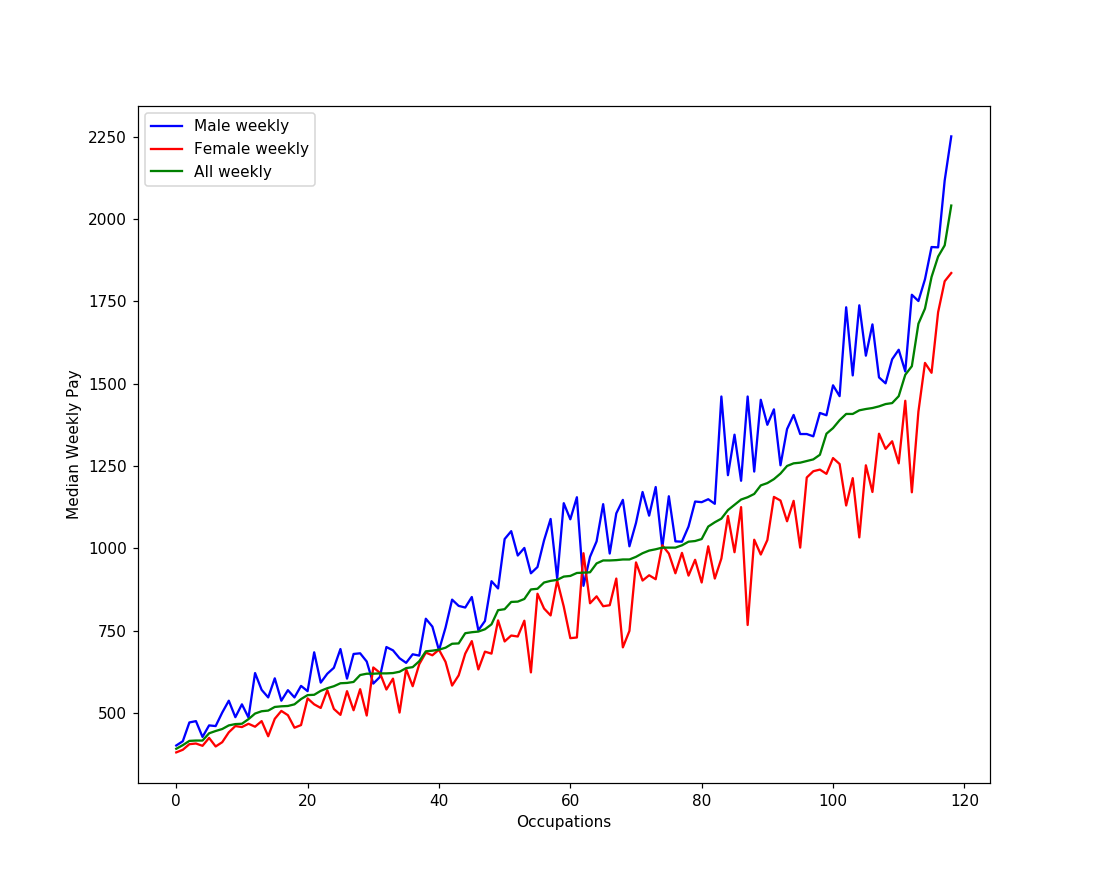

In [12]:
sort = all_wages.sort_values(by='All_weekly')
fig = plt.figure(figsize=(10, 8))
plt.xlabel("Occupations") # sorry we don't know how to label
plt.ylabel("Median Weekly Pay")
plt.plot(range(len(sort["Occupation"])),sort["M_weekly"], color = "b", label="Male weekly")
plt.plot(range(len(sort["Occupation"])),sort["F_weekly"], color = 'r', label="Female weekly")
plt.plot(range(len(sort["Occupation"])),sort["All_weekly"], color = 'g', label="All weekly")
plt.legend(loc='upper left')

### Observations
As can be seen in the graph, in almost all occupations, the women's median pay is consistently lower than median pay for all workers.

#### Let's calculate how often.

In [23]:
def low(row):
    if row['All_weekly'] > row["F_weekly"]:
        return 1
    return 0
all_wages['low'] = all_wages.apply(lambda row: low(row), axis=1)
print str(round(sum(all_wages['low'])*100.0/len(all_wages), 2))+ '%'

95.8%


In [ ]:
# How often is the men's pay under the median?
def low(row):
    if row['All_weekly'] > row["M_weekly"]:
        return 1
    return 0
all_wages['low'] = all_wages.apply(lambda row: low(row), axis=1)
print sum(all_wages['low'])*100.0/len(all_wages)

### Question: Does the representation of women in the workforce correlate with their median pay relative to the median pay for all workers?

In [24]:
def percent_female_workers(row):
    return row['F_workers'] * 100.0 / row['All_workers']

In [25]:
all_wages['percent_f_workers'] = all_wages.apply(lambda row: percent_female_workers(row), axis=1)
percent_female = all_wages[['Occupation', 'All_workers', 'F_workers','percent_f_workers']]
sorted_worker = percent_female.sort_values(by=['percent_f_workers'])
sorted_worker.head()

,Occupation,All_workers,F_workers,percent_f_workers
528,Driver/sales workers and truck drivers,2687,105,3.907704
228,Police and sheriff's patrol officers,655,86,13.129771
96,"Engineers, all other",393,54,13.740458
550,"Laborers and freight, stock, and material move...",1433,219,15.282624
130,Clergy,376,60,15.957447


In [26]:
slope_opt = all_wages["percent_f_workers"].cov(all_wages["percentage_points"]) / all_wages["percent_f_workers"].var()
intercept_opt = all_wages["percentage_points"].mean() - slope_opt * all_wages["percent_f_workers"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

Optimal slope: -0.105970876854
Optimal intercept: 24.4844882385


In [27]:
fig = plt.figure(figsize=(10, 8))
plt.plot(all_wages["percent_f_workers"],all_wages["percentage_points"],"o", markersize=4)
plt.xlabel("Percent of Female Workers")
plt.ylabel("Percentage Points")
plt.title("Percent of Female Force v. Percentage Points")
plt.grid()

xvals = np.arange(all_wages["percent_f_workers"].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig2.canvas.draw()

<IPython.core.display.Javascript object>

NameError: name 'fig2' is not defined

To examine the strength of the relationship between the two variables, let's calculate the correlation coefficient.

In [55]:
print(np.corrcoef(all_wages["percent_f_workers"],all_wages["percentage_points"])[0,1])

-0.117961006196


In [56]:
import statsmodels.api as sm
all_wages["Constant"] = 1
m = sm.OLS(all_wages["percentage_points"], all_wages[["percent_f_workers", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percentage_points   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.976
Date:                Tue, 19 Dec 2017   Prob (F-statistic):              0.162
Time:                        18:53:06   Log-Likelihood:                -553.45
No. Observations:                 142   AIC:                             1111.
Df Residuals:                     140   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
percent_f_workers    -0.0676      0.048     -1.406      0.162      -0.163       0.027
Constant             22.9635      2.501      9.182      0.000      18.019      27.908
==============================================================================
Omnibus:                        9.176   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.124
Skew:                           0.549   Prob(JB):                       0.0104
Kurtosis:                       3.580   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see here that the correlation between the two variables is very low.

## Conclusion
* There is an observable pay gap for many occupations.
* It is unlikely that the pay gap is related to the represen